In [410]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [411]:
beta = 0.95 #瞬时重量系数,飞行中飞机重量m 与起飞重量m0 之比
alpha = 0.2 # 飞行中发动机安装推力与海平面静推力F0之比
k_TO = 1.5 #起飞安全速度系数
S_G = 1200 #起飞滑跑距离
rho = 1.29 
C_Lmax = 1.5
C_d0 = 0.005 #零升阻力系数
g = 9.8 #重力加速度
k1 = 0.06 #阻力极曲线方程中的二次项系数
k2 = 0 #阻力极曲线方程中的一次项系数
v = 250
q = 0.5*rho*v**2
x = linspace(100,500,2000) #翼载荷

## 起飞滑跑约束

In [412]:
# T为推重比
T1 = beta**2/alpha*k_TO**2/(S_G*rho*C_Lmax)*x

## 爬升率约束

In [413]:
c_rate = 10 #爬升率

In [414]:
T2 = beta/alpha*(k1*beta*g/q*x+k2+C_d0*q/beta/g/x+c_rate/v)

## 最大马赫数约束

In [415]:
T3 = beta/alpha*(k1*beta*g/q*x+k2+C_d0*q/beta/g/x)

## 水平加减速约束

In [416]:
a = 0.5 #加速度

In [417]:
T4 = beta/alpha*(k1*beta*g/q*x+k2+C_d0*q/rho/g/x+a/g)

## 持续盘旋过载约束

In [418]:
n = 5 #最大过载
T5 = beta/alpha*(k1*n**2*beta*g/q*x+k2*n+C_d0*q/beta/g/x)

## 升限约束

In [419]:
dh = 10 #爬升率

In [420]:
T6 = beta/alpha*(k1*beta*g/q*x+k2+C_d0*q/beta/g/x+dh/v)

## 着陆滑跑距离约束

In [421]:
mu = 0.1 #着陆摩擦系数
x_ap = 2000 #着陆滑跑距离
k_td = 1.5 #安全速度系数

In [422]:
x0 = x_ap*rho*C_lmax*mu/k_td**2/beta

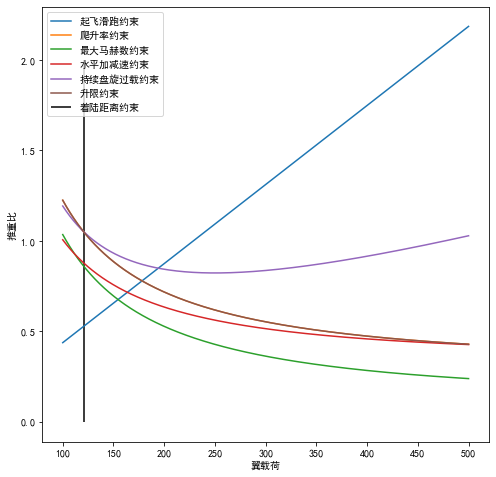

In [429]:
import seaborn as sns
import matplotlib as mpl

mpl.rcParams['font.sans-serif'] = ['SimHei']  
mpl.rcParams['axes.unicode_minus'] = False  
figure(figsize = (8,8))
plot(x,T1, label = "起飞滑跑约束")
plot(x,T2, label = "爬升率约束")
plot(x,T3, label = "最大马赫数约束")
plot(x,T4, label = "水平加减速约束")
plot(x,T5, label = "持续盘旋过载约束")
plot(x,T6, label = "升限约束")
vlines(x0,0,2, label = "着陆距离约束")
xlabel('翼载荷')
ylabel("推重比")
legend()

## 气动特性初步估计

In [424]:
A = 8 #展弦比
A0 = pi/9 #前缘后掠角
e = 4.61*(1-0.045*A**0.68)*cos(A0)**0.15-3.1 #奥斯瓦尔德系数
k1 = 1/pi/A/e
k1

0.0639709645836725